## Titanic Study
#### Problem Statement: Complete the analysis of what sorts of people were likely to survive. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
dataset=pd.read_csv('datasets/titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.shape

(891, 12)

In [4]:
pd.unique(dataset['Survived'])

array([0, 1], dtype=int64)

In [5]:
pd.unique(dataset['Pclass'])

array([3, 1, 2], dtype=int64)

In [7]:
pd.unique(dataset['Sex'])

array(['male', 'female'], dtype=object)

In [8]:
pd.unique(dataset['SibSp']) #Siblings or Spouse

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [9]:
pd.unique(dataset['Parch']) #Parents or Childrens

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [10]:
pd.unique(dataset['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


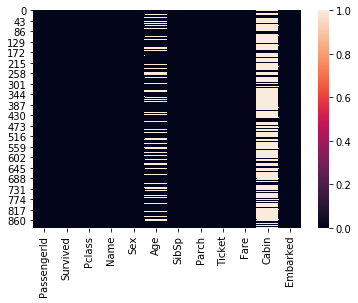

In [12]:
sb.heatmap(dataset.isnull())

In [13]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


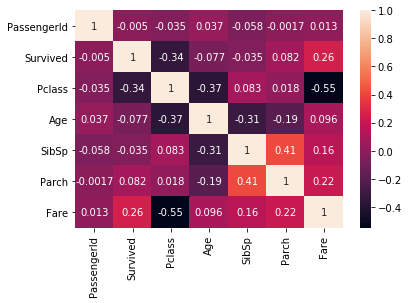

In [23]:
sb.heatmap(dataset.corr(),annot=True)

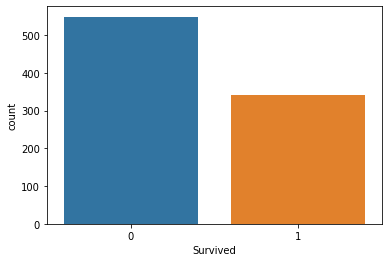

In [24]:
sb.countplot(x='Survived',data=dataset)

In [25]:
dataset.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

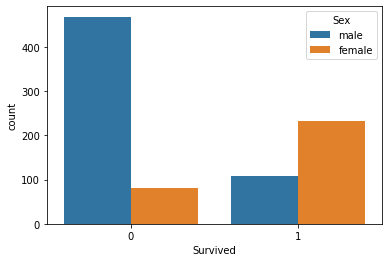

In [26]:
sb.countplot(x='Survived',hue='Sex',data=dataset)

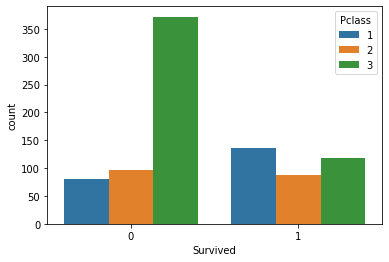

In [27]:
sb.countplot(x='Survived',hue='Pclass',data=dataset)

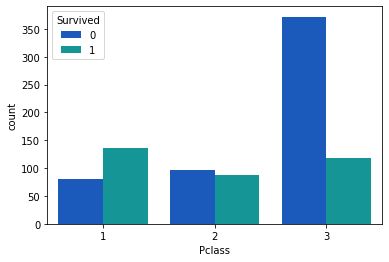

In [30]:
sb.countplot(x='Pclass',hue='Survived',data=dataset, palette='winter')

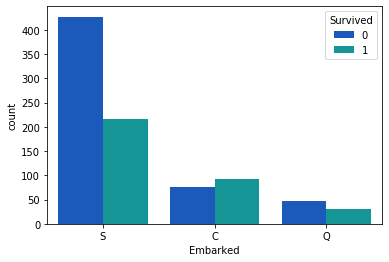

In [34]:
sb.countplot(x='Embarked',hue='Survived',data=dataset, palette='winter')

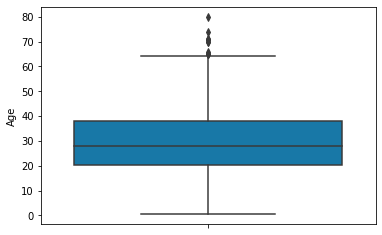

In [39]:
sb.boxplot(y='Age',data=dataset,palette='winter')

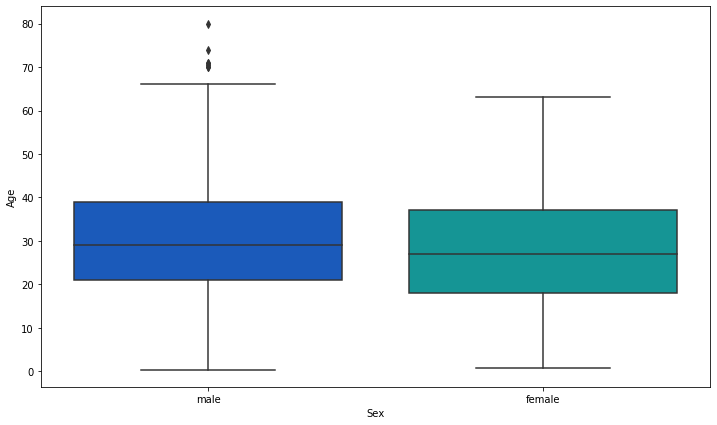

In [37]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Sex',y='Age',data=dataset,palette='winter')

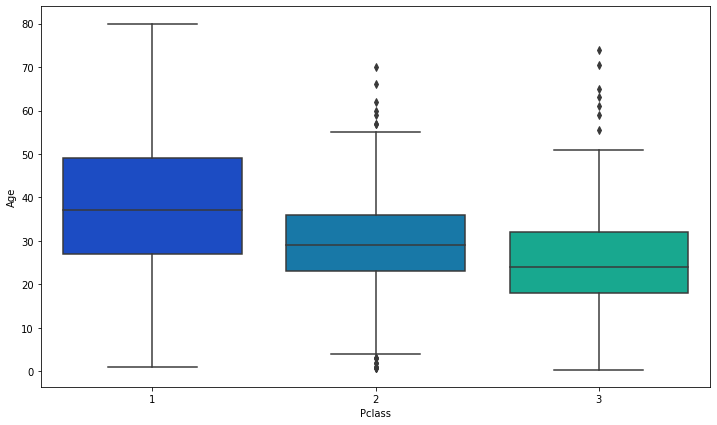

In [40]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [43]:
#Median Values - Age ~ Pclass
dataset[["Pclass", "Age"]].groupby(['Pclass'], as_index=False).median().sort_values(by='Age', ascending=False)

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [45]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [46]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

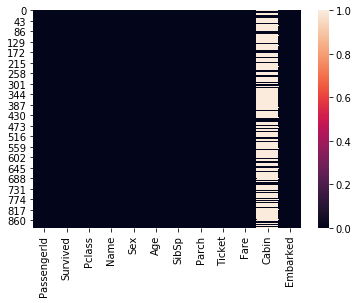

In [47]:
sb.heatmap(dataset.isnull())

In [48]:
dataset.drop('Cabin',axis=1,inplace=True)

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [50]:
pd.unique(dataset.Sex)

array(['male', 'female'], dtype=object)

In [51]:
pd.unique(dataset.Embarked)

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
dataset.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [53]:
common_value = 'S'
dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [54]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [55]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [56]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [57]:
dataset.shape

(891, 9)

In [58]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1), 
                                                    dataset['Survived'], test_size=0.20, 
                                                    random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
logmodel.score(X_train,y_train)

0.8089887640449438

In [62]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.5,0,0,28.500,1,0,1
700,1,18.0,1,0,227.525,0,0,0
748,1,19.0,1,0,53.100,1,0,1
751,3,6.0,0,1,12.475,1,0,1
481,2,29.0,0,0,0.000,1,0,1


In [63]:
logmodel.predict(X_test)[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [64]:
logmodel.predict_proba(X_test)[0:5]

array([[0.66814545, 0.33185455],
       [0.03956506, 0.96043494],
       [0.50085556, 0.49914444],
       [0.80254193, 0.19745807],
       [0.7726196 , 0.2273804 ]])

In [65]:
logmodel.score(X_test,y_test)

0.8100558659217877

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.84      0.71      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[88 11]
 [23 57]]


#### ROC Curve

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score 

In [84]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [86]:
probs = logmodel.predict_proba(X_test)  
probs[:5]

array([[0.66814545, 0.33185455],
       [0.03956506, 0.96043494],
       [0.50085556, 0.49914444],
       [0.80254193, 0.19745807],
       [0.7726196 , 0.2273804 ]])

In [87]:
probs = probs[:, 1]  #probability for survival
probs

array([0.33185455, 0.96043494, 0.49914444, 0.19745807, 0.2273804 ,
       0.06604382, 0.40111742, 0.12389923, 0.85573578, 0.57857645,
       0.2273804 , 0.09096573, 0.65465513, 0.11632734, 0.13141118,
       0.06866956, 0.53910153, 0.14424014, 0.13862441, 0.7699912 ,
       0.08277053, 0.06518972, 0.64394755, 0.5854674 , 0.05639356,
       0.23007809, 0.14879328, 0.22158479, 0.10538404, 0.06842888,
       0.78423659, 0.7982572 , 0.64395693, 0.10500194, 0.09325802,
       0.94265578, 0.09665874, 0.06199681, 0.09927634, 0.43040261,
       0.66893133, 0.57857645, 0.87759451, 0.31230928, 0.17849554,
       0.40151081, 0.05921381, 0.33427877, 0.08014424, 0.2273804 ,
       0.7986365 , 0.3308782 , 0.74544425, 0.66319903, 0.64395693,
       0.11654069, 0.14414847, 0.14361977, 0.29339655, 0.90609014,
       0.91270354, 0.14223974, 0.04916683, 0.58659483, 0.06812182,
       0.26744997, 0.80233446, 0.55656132, 0.57282246, 0.39791602,
       0.58877536, 0.13582172, 0.13181012, 0.13551841, 0.54483

In [88]:
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.88


In [95]:
y_test_arr = np.array(y_test)

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, probs)  

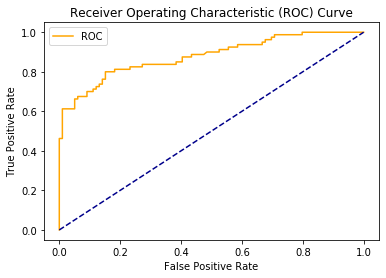

In [102]:
plot_roc_curve(fpr, tpr)  

In [67]:
test_dataset=pd.read_csv('datasets/titanic_test.csv')
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


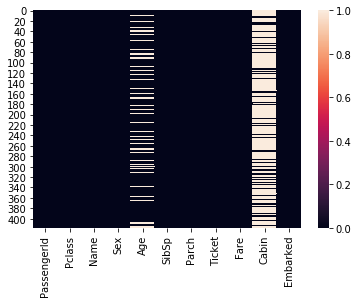

In [69]:
sb.heatmap(test_dataset.isnull())

In [70]:
#Filling missing values
test_dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1) #Imputing Age column
test_dataset['Fare'].fillna(method='ffill',inplace=True) #Imputing Fare column 

In [71]:
#Categorical data encoding
sex_test = pd.get_dummies(test_dataset['Sex'],drop_first=True)
embark_test = pd.get_dummies(test_dataset['Embarked'],drop_first=True)

In [72]:
PassengerId = test_dataset['PassengerId']

In [73]:
#Dropping redundant columns
test_dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [74]:
#Concatenating encoded columns 'Sex' and 'Embarked' to the test dataset
test_dataset = pd.concat([test_dataset,sex_test,embark_test],axis=1)

In [75]:
test_dataset.shape

(418, 8)

In [76]:
test_dataset.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,0,0,7.8292,1,1,0
1,3,38.0,1,0,7.0000,0,0,1
2,2,26.0,0,0,9.6875,1,1,0
3,3,35.0,0,0,8.6625,1,0,1
4,3,35.0,1,1,12.2875,0,0,1


In [82]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [78]:
y_pred_test = logmodel.predict(test_dataset)
y_pred_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [79]:
logmodel.predict_proba(test_dataset)[0:5]

array([[0.8517096 , 0.1482904 ],
       [0.59951314, 0.40048686],
       [0.70671566, 0.29328434],
       [0.91707706, 0.08292294],
       [0.57374341, 0.42625659]])

In [80]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred_test
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [81]:
submission.to_csv('submission.csv', index=False)